# DO NOT USE RUN ALL, MUST UPDATE NUMPY. WILL RESTART RUNTIME

In [1]:
%pip install --upgrade scipy
%pip install --upgrade numpy
exit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 265 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.1 MB 14.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


# YOU MAY NOW RUN ALL

## Install MMPose

We recommend to use a conda environment to install mmpose and its dependencies. And compilers `nvcc` and `gcc` are required.

In [1]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/usr/local/bin/python


In [2]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
%pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
%pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# install mmdet for inference demo
%pip install mmdet

%pip install mmpose

# # clone mmpose repo
%rm -rf mmpose
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose

# # install mmpose dependencies
%pip install -r requirements.txt

# # install mmpose in develop mode
%pip install -e .

%pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████▌                   | 834.1 MB 1.3 MB/s eta 0:16:41tcmalloc: large alloc 1147494400 bytes == 0x39fbe000 @  0x7ff0eaf05615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |███████████████▉                | 1055.7 MB 1.3 MB/s eta 0:14:04tcmalloc: large alloc 1434370048 bytes == 0x7e614000 @  0x7ff0eaf05615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |█████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmpose
  Attempting uninstall: mmpose
    Found existing installation: mmpose 0.29.0
    Uninstalling mmpose-0.29.0:
      Successfully uninstalled mmpose-0.29.0
  Running setup.py develop for mmpose
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Check Pytorch installation
import torch, torchvision

print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose

print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 1.10.0+cu111 True
torchvision version: 0.11.0+cu111
mmpose version: 0.29.0
cuda version: 11.1
compiler information: GCC 7.3


/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [4]:
!pip install timm
from timm.models.layers import drop_path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 14.2 MB/s 
     |████████████████████████████████| 182 kB 68.9 MB/s 


# MMPOSE STRUCTURE FILE


In [5]:
import logging
from abc import ABCMeta, abstractmethod

import torch.nn as nn


class BaseBackbone(nn.Module, metaclass=ABCMeta):
    """Base backbone.
    This class defines the basic functions of a backbone. Any backbone that
    inherits this class should at least define its own `forward` function.
    """

    def init_weights(self, pretrained=None, patch_padding='pad'):
        """Init backbone weights.
        Args:
            pretrained (str | None): If pretrained is a string, then it
                initializes backbone weights by loading the pretrained
                checkpoint. If pretrained is None, then it follows default
                initializer or customized initializer in subclasses.
        """
        if isinstance(pretrained, str):
            logger = logging.getLogger()
            load_checkpoint(self, pretrained, strict=False, logger=logger, patch_padding=patch_padding)
        elif pretrained is None:
            # use default initializer or customized initializer in subclasses
            pass
        else:
            raise TypeError('pretrained must be a str or None.'
                            f' But received {type(pretrained)}.')

    @abstractmethod
    def forward(self, x):
        """Forward function.
        Args:
            x (Tensor | tuple[Tensor]): x could be a torch.Tensor or a tuple of
                torch.Tensor, containing input data for forward computation.
        """

# BACKBONE CLASSES



In [6]:
#-----------TODO -----------------------------------------------
# INSERT OUR BACKBONE , BRING IN BACKBONE CLASS AND backbonemodel CLASS TO PROPERLY REGISTER
class stochasticDepth(nn.Module):
    def __init__(self, drop_prob=None):
        super(stochasticDepth, self).__init__()
        self.drop_prob = drop_prob

    def forward(self, x):
        return drop_path(x, self.drop_prob, self.training)

class PatchEmbed(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_channels=768, ratio=1):
        # patch size is img_size / 14
        super().__init__()
        #img_size = (img_size,img_size)
        patch_size = (patch_size,patch_size)
        num_patches = (img_size[1] // patch_size[1]) * (img_size[0] // patch_size[0]) * (ratio ** 2)
        self.patch_shape = (int(img_size[0] // patch_size[0] * ratio), int(img_size[1] // patch_size[1] * ratio))
        self.origin_patch_shape = (int(img_size[0] // patch_size[0]), int(img_size[1] // patch_size[1]))
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = num_patches
        self.proj = nn.Conv2d(in_channels, embed_channels, kernel_size=patch_size, stride=(patch_size[0] // ratio), padding=4 + 2 * (ratio//2-1))

    def forward(self, input):
        output = self.proj(input)
        heightPatch, widthPatch = output.shape[2], output.shape[3]
        output = output.flatten(2).transpose(1, 2)
        return output, (heightPatch, widthPatch)

class attentionBlock(nn.Module):
  def __init__(self, num_embedding, num_heads = 12, qkv_bias=True, attention_drop=0.0, projection_drop=0.0):
    super().__init__()
    self.num_heads = num_heads # total heads
    self.input_dim = num_embedding #input dim for attention heads
    self.head_dim = num_embedding // num_heads # dividing dimensionaly such that output attention head matches input dim
    total_head = self.head_dim * self.num_heads
    self.scale = self.head_dim ** -0.5 # preventing vanishing gradients in softmax etc...
    self.qkv = nn.Linear(self.input_dim,total_head*3, bias=qkv_bias) # generate query key and value QKV
    self.drop1 = nn.Dropout(attention_drop) # dropout after attention
    self.project = nn.Linear(total_head, self.input_dim) # linear layer
    self.drop2 = nn.Dropout(projection_drop) # dropout to prevent overfitting

  def forward(self, input):
    batch_size, tocken_size, embed_size = input.shape #num_tockens = num_patches+1
    QKV = self.qkv(input) # query key and values
    QKV = QKV.reshape(batch_size, tocken_size, 3, self.num_heads, -1) # (batch_size, num_tokens, 3, num_heads, head_dim)
    QKV = QKV.permute(2,0,3,1,4) # (3, batch_size, num_heads, num_tokens, head_dim)
    Q, K, V = QKV[0], QKV[1], QKV[2]
    K_tranpose = K.transpose(-2,-1) # (batch_size, num_heads, dead_dim, num_tokens)
    Q = Q * self.scale
    product = (Q @ K_tranpose) # (batch_size, num_heads, num_tokens, num_tokens)
    attention = product.softmax(dim=-1) # (batch_szie, num_heads, num_toekns, num_tokens)
    attention = self.drop1(attention)
    average = attention @ V # (batch_size, num_heads, num_tokens, head_dim)
    average = average.transpose(1,2) # (batch_szie, num_tokens, num_heads, head_dim)
    average = average.reshape(batch_size, tocken_size, -1) # (batchsize, num_tokens, original dim)
    output = self.project(average) # (batch_szie, num_tokens, iriginal dim)
    output = self.drop2(output) # final dropout
    return output

class FFN(nn.Module):
  def __init__(self, input_features, hidden_features, output_features, drop_rate=0.0):
    super().__init__()
    self.fc1 = nn.Linear(input_features, hidden_features)
    self.activate = nn.GELU()
    self.fc2 = nn.Linear(hidden_features, output_features)
    self.drop = nn.Dropout(drop_rate)

  def forward(self, input):
    output = self.fc1(input)
    output = self.activate(output)
    #output = self.drop(output)
    output = self.fc2(output)
    output = self.drop(output)
    return output

class transformerBlock(nn.Module):
  def __init__(self, num_embedding=768, num_heads=12, hiddenFactor = 4.0, qkv_bias=True, attention_drop = 0.0, projection_drop = 0.0, drop_rate=0.0):
    super().__init__()
    self.LN1 = nn.LayerNorm(num_embedding)
    self.attention = attentionBlock(num_embedding, num_heads=num_heads, qkv_bias=qkv_bias, attention_drop=attention_drop, projection_drop=projection_drop )
    self.LN2 = nn.LayerNorm(num_embedding)
    self.ffn = FFN(input_features = num_embedding, hidden_features=int(num_embedding*hiddenFactor), output_features = num_embedding)
    self.stochastic_depth = stochasticDepth(drop_rate) if drop_rate > 0. else nn.Identity()

  def forward(self, input):
    input = input + self.stochastic_depth(self.attention(self.LN1(input)))
    output = input + self.stochastic_depth(self.ffn(self.LN2(input)))
    return output

# BACKBONE COMPLETE CLASS

In [7]:
from mmpose.models.builder import BACKBONES
#from mmpose.base.backbone import BaseBackbone
@BACKBONES.register_module()
class visionNetwork(BaseBackbone):
  def __init__(
      self, image_size=224, patch_size=16, embed_dim=768, L = 12, num_heads=12, hiddenFactor=4.0, 
      qkv_bias=True, attention_drop=0.0, projection_drop=0.0, drop_rate=0.0, pretrained=None):
    super(visionNetwork, self).__init__()
    # vision transformer
    self.patchEmbedding = PatchEmbed(img_size=image_size, patch_size=patch_size, in_channels=3, embed_channels=embed_dim) 
    #self.classToken = nn.Parameter(torch.zeros(1,1,embed_dim))
    #### I think this positionToken is just set to zero and never really changes its value from zero - Bernardo ####
    self.positionToken = nn.Parameter(torch.zeros(1,1+self.patchEmbedding.num_patches, embed_dim))

    self.positionDrop = nn.Dropout(p=projection_drop)
    drop_factor = [x.item() for x in torch.linspace(0, drop_rate, L)]
    self.transformerList = nn.ModuleList(
        [transformerBlock(
            num_embedding=embed_dim, num_heads=num_heads, hiddenFactor=4.0, 
            qkv_bias=True, attention_drop=attention_drop, projection_drop=projection_drop, drop_rate=drop_factor[i]) 
        for i in range(L)]) 
    # decoder section
    self.decodeLN = nn.LayerNorm(embed_dim)
    #self.head = nn.Linear(embed_dim, output_classes)

    # if init_weights:
    #         self._initialize_weights()


  def forward(self, input):
    #print("IMAGE SHAPE: ", input.shape)
    batch_size = input.shape[0]
    output, (heightPatch, widthPatch) = self.patchEmbedding(input)
    #print("OUTPUT SHAPE BEFORE CLASS TOKEN: ", output.shape)
    #class_token = self.classToken.expand(batch_size,-1,-1)
    #output = torch.cat((class_token, output), dim=1)
    #print("OUTPUT SHAPE: ", output.shape, "POSITION TOKEN SHAPE", self.positionToken.shape, "NONZERO POSITION TOKEN ELEMENTS:", torch.sum(self.positionToken > 0))
    output = output + self.positionToken[:,:1] + self.positionToken[:,1:]
    output = self.positionDrop(output)
    for transformerBlock in self.transformerList:
      output = transformerBlock(output)
    output = self.decodeLN(output)
    output = output.permute(0, 2, 1).reshape(batch_size, -1, heightPatch, widthPatch).contiguous()
    #classPrediction = output[:, 0]
    #classPrediction = self.head(classPrediction)
    return output

  def init_weights(self, pretrained=None):
        """Initialize the weights in backbone.
        Args:
            pretrained (str, optional): Path to pre-trained weights.
                Defaults to None.
        """
        #super().init_weights(pretrained, patch_padding=self.patch_padding)

        if pretrained is None:
            def _init_weights(m):
                if isinstance(m, nn.Linear):
                    nn.init.normal_(m.weight, 0, std=.02)
                    if isinstance(m, nn.Linear) and m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, nn.LayerNorm):
                    nn.init.constant_(m.bias, 0)
                    nn.init.constant_(m.weight, 1.0)

            self.apply(_init_weights)

# Data Loading

In [50]:
!rm test_image.jpg
!gdown "19EFzUXqOgvdHwZvtl4MsubwUjB0JEYFx&confirm=t" # test_image.jpg  https://drive.google.com/file/d/180SKuXNhkfNh_Y91i_HGjp1CgmwoCjpO/view?usp=share_link
# https://drive.google.com/file/d/1wqkqIvSy2_qpd3TZ8RuTWW-agYCcMseE/view?usp=share_link
#https://drive.google.com/file/d/19EFzUXqOgvdHwZvtl4MsubwUjB0JEYFx/view?usp=sharing
#https://drive.google.com/file/d/1NtjcTZI0OCplwwGzJJXL9e185NnZLM9B/view?usp=sharing
#https://drive.google.com/file/d/13Hl-hM4Y5LDvqvp5mOQNRAr9vHwEzbL8/view?usp=sharing
#https://drive.google.com/file/d/19EFzUXqOgvdHwZvtl4MsubwUjB0JEYFx/view?usp=share_link
#https://drive.google.com/file/d/1wqkqIvSy2_qpd3TZ8RuTWW-agYCcMseE/view?usp=share_link
# https://drive.google.com/file/d/1d3gK1GuPz4BHq24qtKzn2HOAvgy6k4Hr/view?usp=share_link
# https://drive.google.com/file/d/1wqkqIvSy2_qpd3TZ8RuTWW-agYCcMseE/view?usp=share_link
# https://drive.google.com/file/d/19EFzUXqOgvdHwZvtl4MsubwUjB0JEYFx/view?usp=share_link


rm: cannot remove 'test_image.jpg': No such file or directory
Downloading...
From: https://drive.google.com/uc?id=19EFzUXqOgvdHwZvtl4MsubwUjB0JEYFx&confirm=t
To: /content/mmpose/Bernardo.jpg
100% 163k/163k [00:00<00:00, 97.2MB/s]


In [48]:
!rm our_model.pth
!gdown "1AgDSaJyQSThd2rXKkz92e14SUtzGsca7&confirm=t" # https://drive.google.com/file/d/1Xrp469ARjN3Je2VD7kC7QcHowxyPa9mh/view?usp=share_link our_model.pth
#https://drive.google.com/file/d/1AgDSaJyQSThd2rXKkz92e14SUtzGsca7/view?usp=share_link
# https://drive.google.com/file/d/1Xrp469ARjN3Je2VD7kC7QcHowxyPa9mh/view?usp=share_link
# https://drive.google.com/file/d/1AgDSaJyQSThd2rXKkz92e14SUtzGsca7/view?usp=share_link
# 

rm: cannot remove 'our_model.pth': No such file or directory
Downloading...
From: https://drive.google.com/uc?id=1AgDSaJyQSThd2rXKkz92e14SUtzGsca7&confirm=t
To: /content/mmpose/vitpose_our_model_full.pth
100% 1.08G/1.08G [00:19<00:00, 56.3MB/s]


In [49]:
!rm vitpose_our_config_half.py
!gdown "1E-jXC30lMSKRHRDTACac_gtU0lh60o4K&confirm=t" # https://drive.google.com/file/d/1UqQyNr9MKJW9d6fkFanpIZi5YmbuZ57g/view?usp=share_link our_config.py
# https://drive.google.com/file/d/1E-jXC30lMSKRHRDTACac_gtU0lh60o4K/view?usp=share_link
# https://drive.google.com/file/d/1UqQyNr9MKJW9d6fkFanpIZi5YmbuZ57g/view?usp=share_link
# https://drive.google.com/file/d/1E-jXC30lMSKRHRDTACac_gtU0lh60o4K/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1E-jXC30lMSKRHRDTACac_gtU0lh60o4K&confirm=t
To: /content/mmpose/vitpose_our_config_full.py
100% 4.68k/4.68k [00:00<00:00, 6.54MB/s]


# Inference with an MMPose model

MMPose provides high level APIs for model inference and training.

load checkpoint from local path: vitpose_our_model_full.pth
load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth


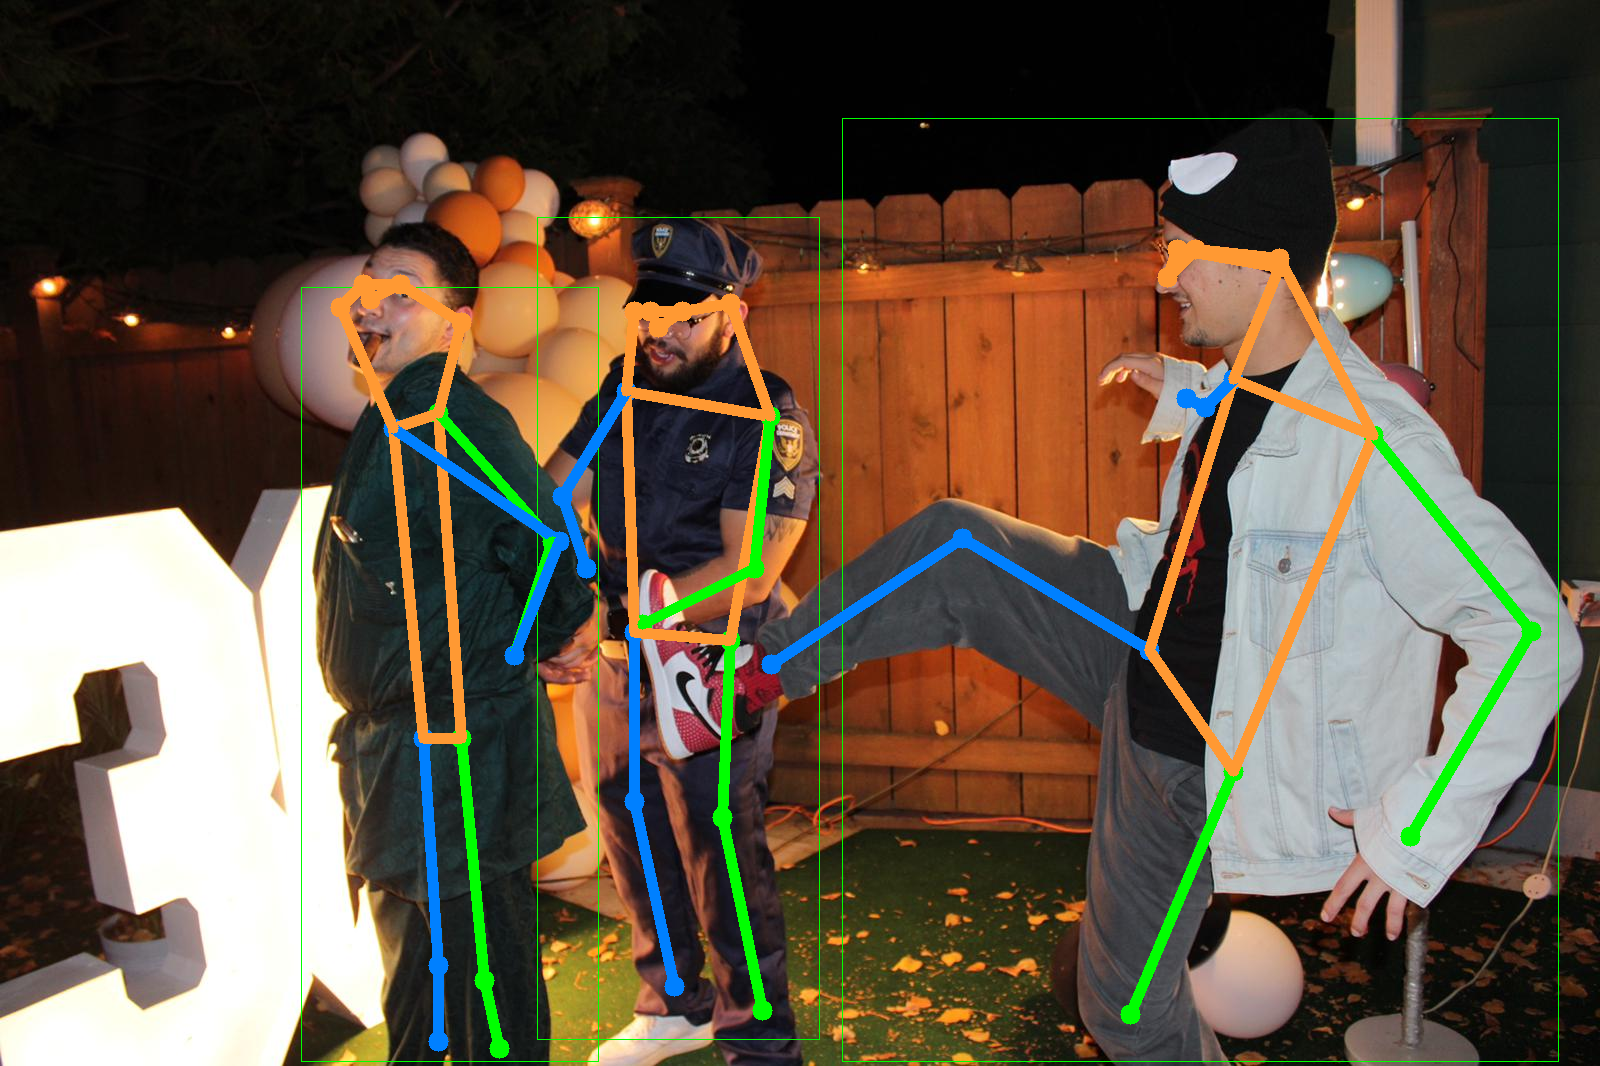

In [51]:
import cv2
from mmpose.apis import inference_top_down_pose_model, init_pose_model, vis_pose_result, process_mmdet_results
from mmdet.apis import inference_detector, init_detector

local_runtime = False

try:
    from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
    local_runtime = True

#--------------TODO ------------------------------------------------------

# CHANGE THIS TO OUR STUFF pose_config.py and the latest.pth file
# HOPEFULLY THE AUTHORS WEIGHTS CAN BE SUBSTITUTED WITHOUT ISSUE BUT INVESTIGATE THIS
pose_config = 'vitpose_our_config_full.py'
pose_checkpoint = 'vitpose_our_model_full.pth'

#---------------TODO--------------------------------------------------------------

# THIS IS FOR BOUNDING BOX DETECTOR, THINK WE SHOULD LEAVE IT ALONE
det_config = 'demo/mmdetection_cfg/yolov3_d53_320_273e_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'

# det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
# det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
det_model = init_detector(det_config, det_checkpoint)

#------------TODO---------------------------------------------------------------
#print("hi")
# TAKE A FEW PICTURES OF YOU WITH INTERESTING POSE
img = 'Bernardo.jpg'

#-----------TODO----------------------------------------------------------------

# inference detection
mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=1)

# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(
    pose_model,
    img,
    person_results,
    bbox_thr=0.3,
    format='xyxy',
    dataset=pose_model.cfg.data.test.type)

# show pose estimation results
vis_result = vis_pose_result(
    pose_model,
    img,
    pose_results,
    dataset=pose_model.cfg.data.test.type,
    thickness=10,
    kpt_score_thr=0.23,
    radius=10,
    show=False)
#print(vis_result)
# reduce image size
#vis_result = cv2.resize(vis_result, dsize=None, fx=0.25, fy=0.25)

if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join('pose_results.png')
        cv2.imwrite(file_name, vis_result)
        display(Image(file_name))
else:
    cv2_imshow(vis_result)
    cv2.imwrite('pose_results.png', vis_result)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r "pose_results.png" "/content/drive/MyDrive/EECS504_Project/inference"